In [57]:
# import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import factorial
from scipy.optimize import curve_fit
import scipy.integrate as integrate

In [3]:
# constants
#Falls was eine davon brauchen ;)
c = 3 * 10 **8
e = 1.6 * 10 **-19
ϵ0 = 8.854 * 10 **-12
me = 0.511 / c**2
mp = 938 / c**2
N_A = 6.022 * 10 **23
m_α = 3727.379 / c**2
W_air = 85.7 * 10 **-6
W_He = 41.8 * 10 **-6
W_Ar = 187 * 10 **-6
Z_α = 2
Ekin_α = 5.486
k_b = 1.38 * 10 **-23
k_air = 14.4
k_He = 2
k_Ar = 18
# MeV/J
MeV_J = 1/e * 10**-6
n_refr = 1.33000
λ_green = 532*10**-9 #m
η = 0.89454

In [4]:
#data input

T = 295

path = "Data/"
angles_A = range(20,160,10) 
angles_B = angles_A[1:]
angle_C = 40
angle_D = 40
data_A_cor = []
data_A_int = []
data_B_cor = []
data_B_int = []
data_C_cor = []
data_C_int = []
data_D_cor = []
data_D_int = []


# sample A
files = ['A' + str(a) + '.ASC' for a in angles_A]
for file in files:
    input = path+file
    read_cor = False;
    read_int = False;
    data_cor_angle = [[],[]]
    data_int_angle = [[],[]]
    
    for line in open(input):
    #print(line)        
        if(read_int):
            d = line.split("\t")    
            try :
                data_int_angle[0].append(float(d[0])) 
                data_int_angle[1].append(float(d[1])) 
            except ValueError : 
                pass#print("Value Error :",d)

        if('"Count Rate"' in line):
            read_cor =False;
            read_int = True;

        if(read_cor):
            line = line.replace("\n"," ")
            d = line.split("\t") 
            #print(d)
            try :
                data_cor_angle[0].append(float(d[0])) 
                data_cor_angle[1].append(float(d[1]))  
            except ValueError : 
                pass#print("Value Error :",d)

        if('"Correlation"' in line):
            #print("read Correlation")
            read_cor =True;
            read_int =False;

    
    data_A_cor.append(data_cor_angle);
    data_A_int.append(data_int_angle);     


# sample B
files = ['B' + str(a) + '.ASC' for a in angles_B]
for file in files:
    input = path+file
    read_cor = False;
    read_int = False;
    data_cor_angle = [[],[]]
    data_int_angle = [[],[]]
    
    for line in open(input):
    #print(line)        
        if(read_int):
            d = line.split("\t")    
            try :
                data_int_angle[0].append(float(d[0])) 
                data_int_angle[1].append(float(d[1])) 
            except ValueError : 
                print("Value Error :",d)

        if('"Count Rate"' in line):
            read_cor =False;
            read_int = True;

        if(read_cor):
            line = line.replace("\n"," ")
            d = line.split("\t") 
            #print(d)
            try :
                data_cor_angle[0].append(float(d[0])) 
                data_cor_angle[1].append(float(d[1]))  
            except ValueError : 
                pass#print("Value Error :",d)

        if('"Correlation"' in line):
            #print("read Correlation")
            read_cor =True;
            read_int =False;

    
    data_B_cor.append(data_cor_angle);
    data_B_int.append(data_int_angle); 

    
# sample C
file = 'C' + str(angle_C) + '.ASC'
input = path+file
read_cor = False;
read_int = False;
data_cor_angle = [[],[]]
data_int_angle = [[],[]]

for line in open(input):
    #print(line)        
    if(read_int):
        d = line.split("\t")    
        try :
            data_int_angle[0].append(float(d[0])) 
            data_int_angle[1].append(float(d[1])) 
        except ValueError : 
            pass#print("Value Error :",d)

    if('"Count Rate"' in line):
        read_cor =False;
        read_int = True;

    if(read_cor):
        line = line.replace("\n"," ")
        d = line.split("\t") 
        #print(d)
        try :
            data_cor_angle[0].append(float(d[0])) 
            data_cor_angle[1].append(float(d[1]))  
        except ValueError : 
               pass#print("Value Error :",d)

    if('"Correlation"' in line):
        #print("read Correlation")
        read_cor =True;
        read_int =False;


data_C_cor.append(data_cor_angle);
data_C_int.append(data_int_angle); 


# sample D
file = 'D' + str(angle_D) + '.ASC'
input = path+file
read_cor = False;
read_int = False;
data_cor_angle = [[],[]]
data_int_angle = [[],[]]

for line in open(input):
    #print(line)        
    if(read_int):
        d = line.split("\t")    
        try :
            data_int_angle[0].append(float(d[0])) 
            data_int_angle[1].append(float(d[1])) 
        except ValueError : 
            print("Value Error :",d)

    if('"Count Rate"' in line):
        read_cor =False;
        read_int = True;

    if(read_cor):
        line = line.replace("\n"," ")
        d = line.split("\t") 
        #print(d)
        try :
            data_cor_angle[0].append(float(d[0])) 
            data_cor_angle[1].append(float(d[1]))  
        except ValueError : 
            pass#print("Value Error :",d)

    if('"Correlation"' in line):
        #print("read Correlation")
        read_cor =True;
        read_int =False;

data_D_cor.append(data_cor_angle);
data_D_int.append(data_int_angle); 

Value Error ist hier nicht schlimm und sorgt nur dafür, dass die leere Zeile nicht in data geschrieben wird

In [117]:
#theoretical functions

def gauss(x,m,s):
    return 1/np.sqrt(2*np.pi*s**2)*np.exp(-(x-m)**2/(2*s**2))

def mom_tra(Θ) :
    return 4*np.pi*n_refr/λ_green*np.sin(np.pi/180*Θ/2)

def P(q,a):
    return 9/((q*a)**6)*(np.sin(q*a)-q*a*np.cos(q*a))**2

#def Intensity(q,a,A):
#    a=np.array(a)*10**-9
#    return sum([A*P(q,ai) for ai in a])/len(a)

def Intensity(q,μ_a,σ_a,A):
    rtn = []
    k=3
    μ_a = 10**-9 * μ_a
    σ_a = 10**-9 * σ_a
    for qi in q:
        rtn.append(A*derf(qi,k,μ_a,σ_a))
    return rtn
        

# k sigma-Intervalle werden betrachtet
#def Intensity(q,μ_a,σ_a,A):
#    rtn = []
#    k=3
#    μ_a = 10**-9 * μ_a
#    σ_a = 10**-9 * σ_a
#    for qi in q:
#        result=integrate.quad(lambda x: gauss(x,μ_a,σ_a)*P(qi,x),μ_a-k*σ_a,μ_a+k*σ_a) #/(integrate.quad(lambda x: gauss(x,μ_a,σ_a),μ_a-k*σ_a,μ_a+k*σ_a))
#        rtn.append(A* result[0]/0.997)
#    return rtn
    
def g_1(t,k1,k2,k3):
    return np.exp(k1*t+k2*t**2/2+k3*t**3/6)

def g_2(t,a,k1,k2,k3):
    return a*g_1(t,k1,k2,k3)**2

#def ln_g_2(t,k1,k2,k3,k4,k5,k6,k7):
 #   return #(k1*t+k2*t**2+k3*t**3+k4*t**4+k5*t**5+k6*t**6+k7*t**7)*2

def ln_g_2(t,a,*k):
    sum =0
    i=1
    for x in k:
        sum=sum+x*t**i/factorial(i)
        i+=1
    return 2*sum+np.log(a)

In [116]:
def derf(qi,k,μ_a,σ_a):
    result=integrate.quad(lambda x: gauss(x,μ_a,σ_a)*P(qi,x),μ_a-k*σ_a,μ_a+k*σ_a) #/(integrate.quad(lambda x: gauss(x,μ_a,σ_a),μ_a-k*σ_a,μ_a+k*σ_a))  
    return result[0]

array([  4.43184841e-03,   1.33830226e-04,   1.48671951e-06])

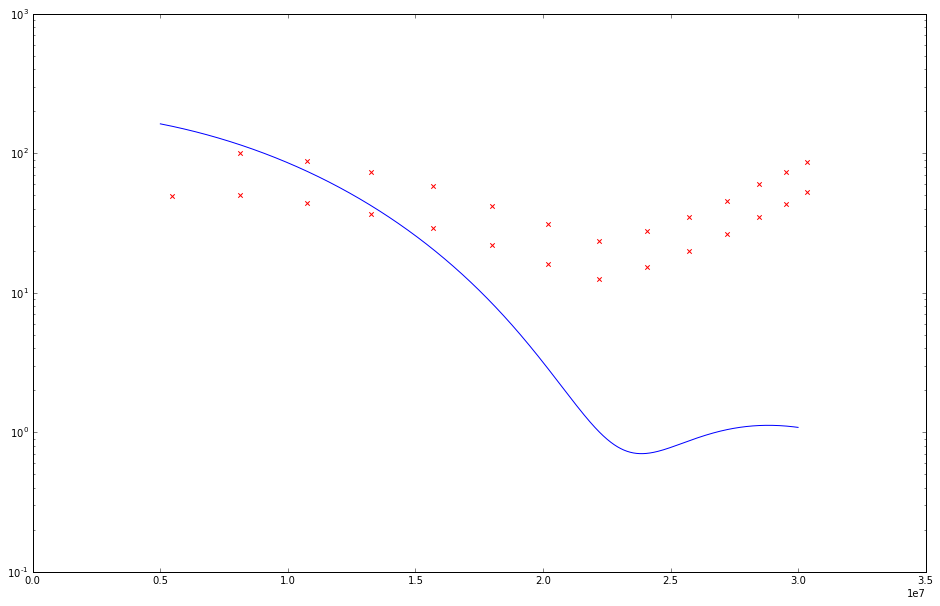

In [176]:
q=np.linspace(5*10**6,3*10**7,10**3)
fig,ax = plt.subplots(figsize=(16,10))
ax.semilogy(q,Intensity(q,200,20,200))
ax.scatter(q_A,data_A_mean_int,marker='x',c='r')
ax.scatter(q_B,data_B_mean_int,marker='x',c='r')

<h1> Static light scattering </h1>

In [6]:
#static light scattering
#evaluation of mean intensitiy
data_A_mean_int = []
data_A_mean_int_err = []
data_B_mean_int = []
data_B_mean_int_err = []

for intensities in data_A_int[:len(angles_A)]:
    mean_value = sum(intensities[1])/len(intensities[1])
    data_A_mean_int_err.append(np.sqrt(sum([(i-mean_value)**2 for i in intensities[1]]))/np.sqrt(len(intensities[1])))
    data_A_mean_int.append(mean_value)

for intensities in data_B_int[:len(angles_B)]:
    mean_value = sum(intensities[1])/len(intensities[1])
    data_B_mean_int_err.append(np.sqrt(sum([(i-mean_value)**2 for i in intensities[1]]))/np.sqrt(len(intensities[1])))
    data_B_mean_int.append(mean_value)

#Intensity correction
for i in range(len(angles_A)):
    data_A_mean_int[i] = data_A_mean_int[i]*np.sin(np.pi/180*angles_A[i])
    
for i in range(len(angles_B)):
    data_B_mean_int[i] = data_B_mean_int[i]*np.sin(np.pi/180*angles_B[i])
    
#evaluation of momentum transfer q 
q_A = [mom_tra(Θ) for Θ in angles_A]
q_A_err = []
q_B = [mom_tra(Θ) for Θ in angles_B]
q_B_err = []
q_C = mom_tra(angle_C)
q_D = mom_tra(angle_D)

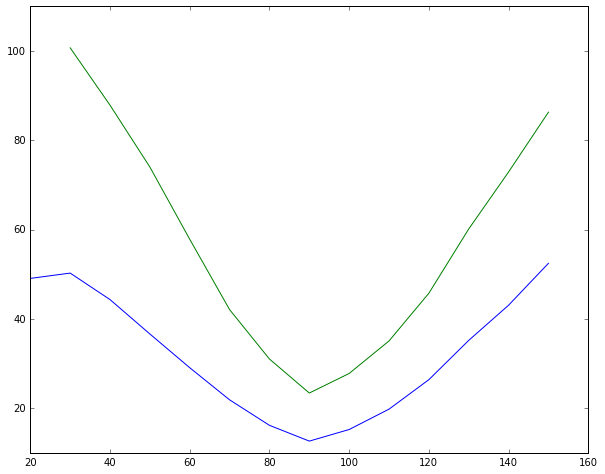

In [7]:
#Plot of mean intensity vs angle
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(angles_A,data_A_mean_int)
ax.plot(angles_B,data_B_mean_int)

In [91]:
Intensity(np.array(q_A),[2,4,9],2)

array([ 1.99959929,  1.99911001,  1.99844628,  1.99762856,  1.99668198,
        1.9956356 ,  1.99452142,  1.99337345,  1.99222662,  1.99111572,
        1.99007437,  1.98913396,  1.98832281,  1.98766525])

TypeError: Intensity() missing 1 required positional argument: 'A'

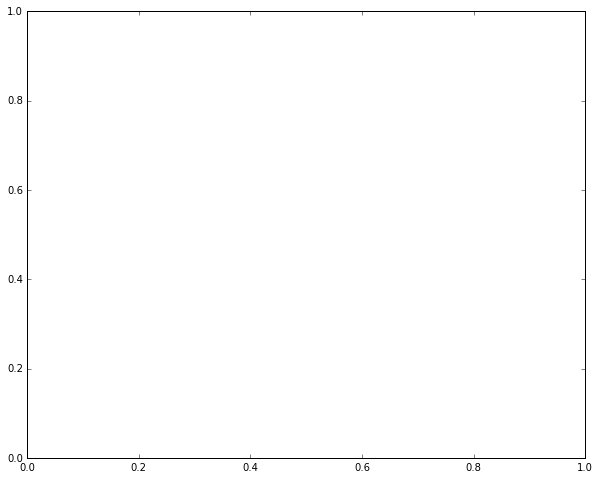

In [138]:
#Plot of mean intensity vs momentum transfer
#popt, pcov = curve_fit(Intensity, q_A, data_A_mean_int)
q = np.linspace(0,32*10**7,1000)
fig,ax = plt.subplots(figsize=(10,8))
ax.semilogy(q,Intensity(q,[30,32,34,36,36,37,38,38,39,39,39,40,40,40,40,50],40),c="r")
ax.scatter(q_A,data_A_mean_int)
ax.scatter(q_B,data_B_mean_int)
#print(popt,pcov,q_A,data_A_mean_int)
#print(Intensity(np.array(q_A),40,1,50),sep='\n\n')

<h1> Dynamic light scattering </h1>

In [16]:
for i in range(len(angles_A)):
    data_A_cor[i][1]=[data/data_A_cor[i][1][0] for data in data_A_cor[i][1]]

sample A
averaged hydrodynamic Radius:  46.8615110144  nm
averaged diffusion coefficient:  5.22354717256e-15  m^2/s


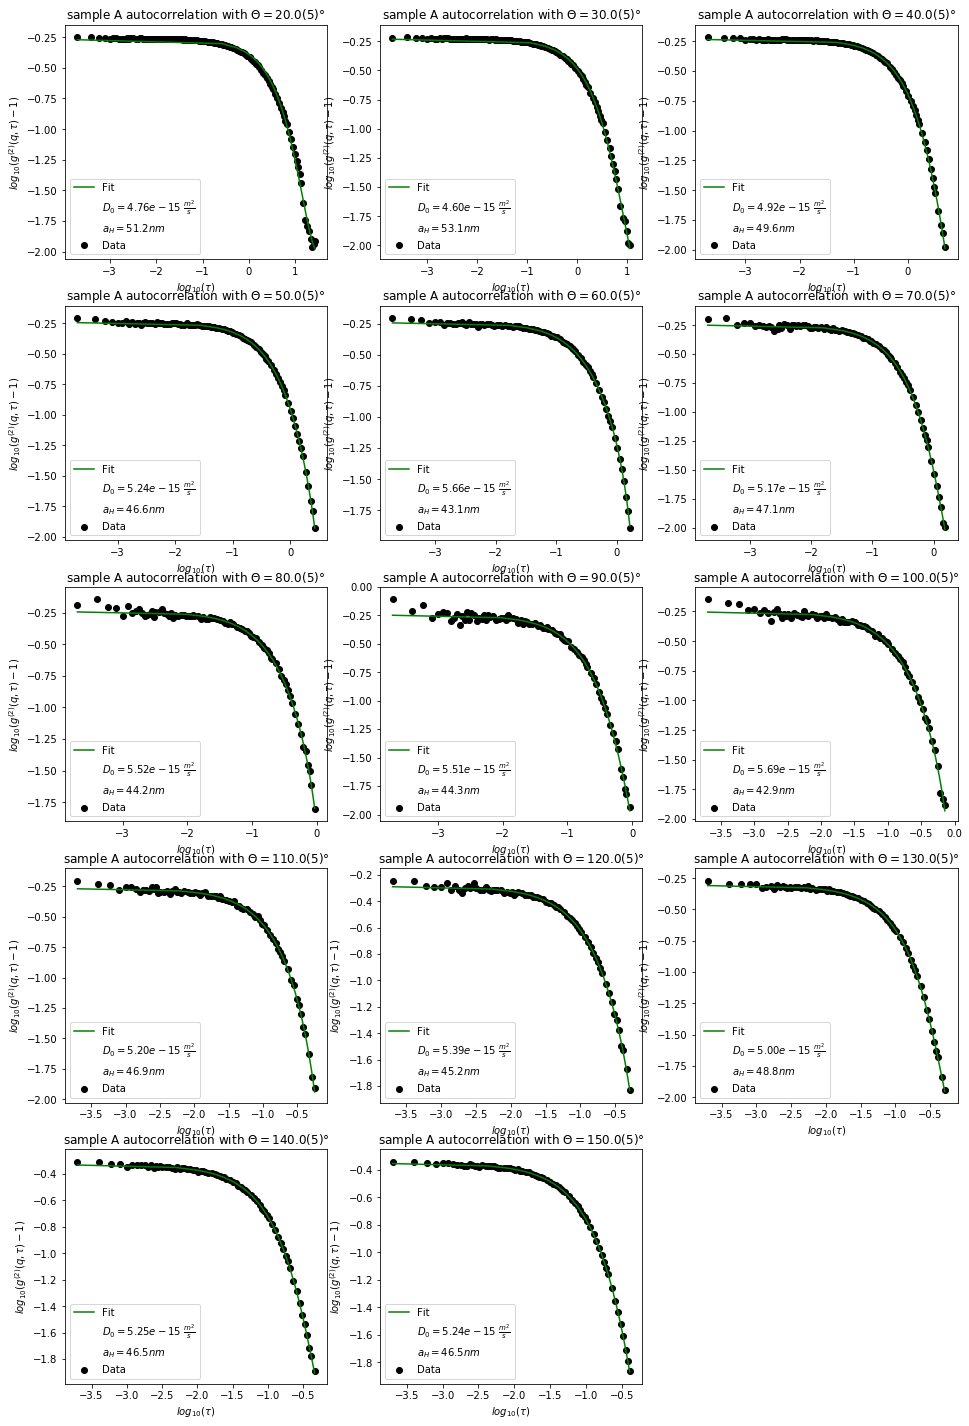

In [31]:
########## sample A ########## 
ah_A = []
D0_A = []
D0_A_mean = 0
ah_A_mean = 0

di=3
fig,ax = plt.subplots(len(angles_A)//di+1,di,figsize=(16,25))

#cut of the noises at the end
for j in range(len(angles_A)):
    i=0
    for x in data_A_cor[j][1]:
        if(x<0.01):
            break
        i+=1
    data_A_cor[j][1] = data_A_cor[j][1][:i]
    data_A_cor[j][0] = data_A_cor[j][0][:i]  

for i in range(len(angles_A)):
    #fitting the curve
    popt, pcov = curve_fit(ln_g_2,(data_A_cor[i][0]),np.log(np.abs(data_A_cor[i][1])),p0=[data_A_cor[i][1][0],-1,1,-1])
    d0 = -popt[1]/(q_A[i]**2)   
    D0_A.append(d0)
    ah = k_b*T/(6*np.pi*η*d0)
    ah_A.append(ah)
    
    #Plot der Fits
    t = np.linspace((min(data_A_cor[i][0])),(max(data_A_cor[i][0])),100)  
    ax[i//di][i%di].scatter(np.log10(data_A_cor[i][0]),np.log10((data_A_cor[i][1])),c="black",label="Data")
    ax[i//di][i%di].plot(np.log10(t),np.log10(g_2(t,*popt)),c="green",label="Fit")
    ax[i//di][i%di].plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label=r"$D_0=%0.2e \ \frac{m^2}{s} $"%d0)
    ax[i//di][i%di].plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label="$a_H=%0.1f nm$"%(ah*10**9))
    ax[i//di][i%di].set_xlabel(r'$log_{10}(\tau)$')
    ax[i//di][i%di].set_ylabel(r'$log_{10}({g^{(2)}(q,\tau)-1})$')
    ax[i//di][i%di].set_title('sample A autocorrelation with $\Theta = %.1f(5)°$'%(np.floor(angles_A[i])))
    ax[i//di][i%di].legend(loc="best")
    
    
ax[4][2].set_visible(False)
    
ah_A_mean = sum(ah_A)/len(angles_A)
D0_A_mean = sum(D0_A)/len(angles_A)
print("sample A")
print("averaged hydrodynamic Radius: ",(ah_A_mean*10**9)," nm")
print("averaged diffusion coefficient: ",D0_A_mean," m^2/s")


sample B
averaged hydrodynamic Radius:  57.3408437224  nm
averaged diffusion coefficient:  4.25635230477e-15  m^2/s


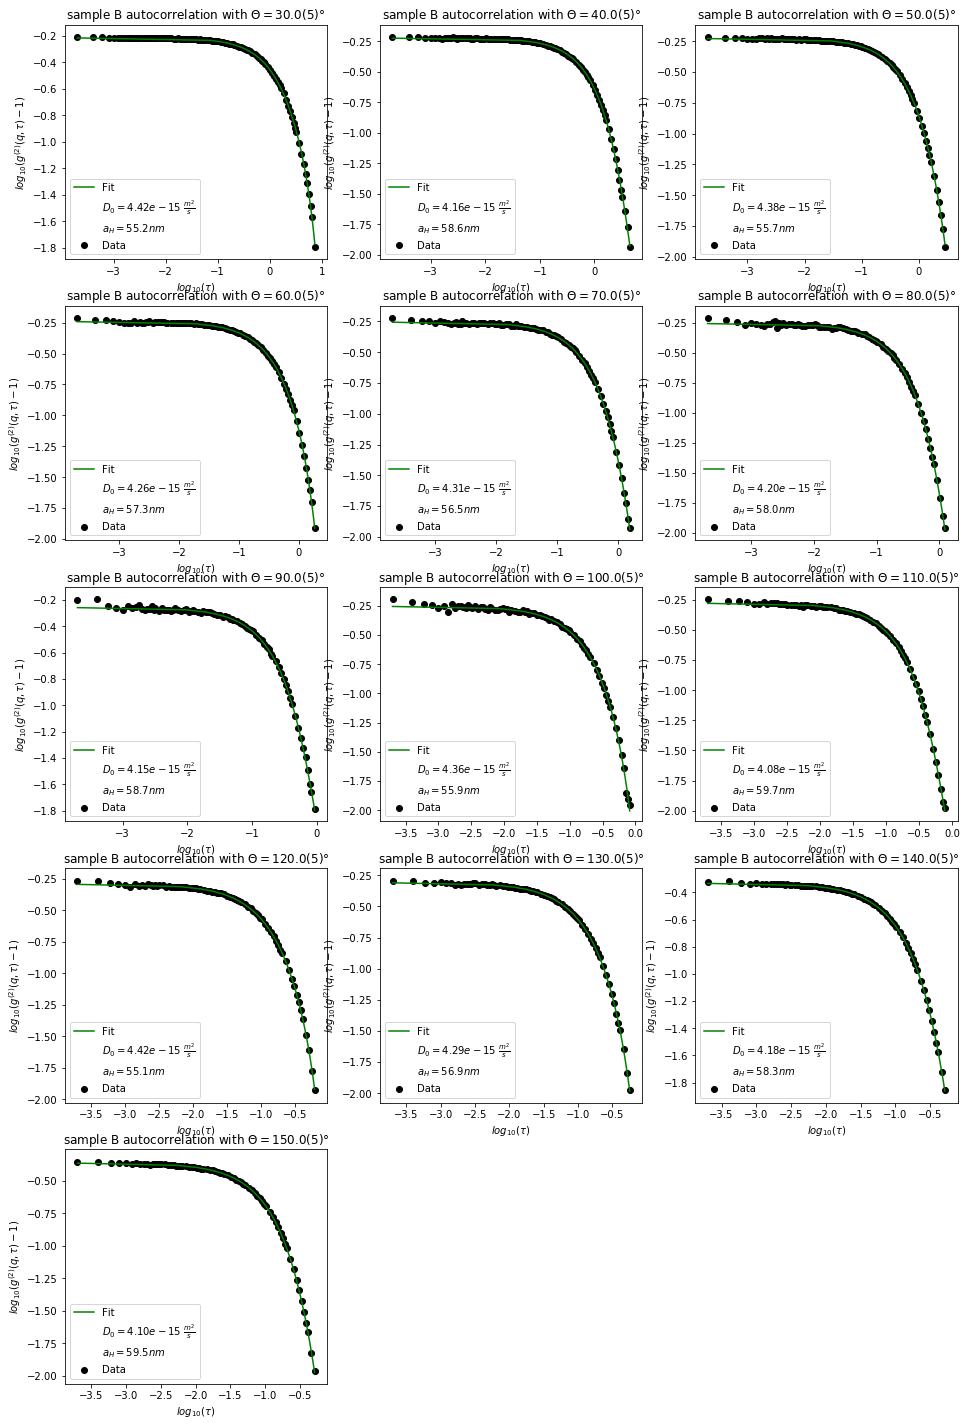

In [32]:
########## sample B ########## 
ah_B = []
D0_B = []
D0_B_mean = 0
ah_B_mean = 0

di=3
fig,ax = plt.subplots(len(angles_B)//di+1,di,figsize=(16,25))

#cut of the noises at the end
for j in range(len(angles_B)):
    i=0
    for x in data_B_cor[j][1]:
        if(x<0.01):
            break
        i+=1
    data_B_cor[j][1] = data_B_cor[j][1][:i]
    data_B_cor[j][0] = data_B_cor[j][0][:i]  

for i in range(len(angles_B)):
    #fitting the curve
    popt, pcov = curve_fit(ln_g_2,(data_B_cor[i][0]),np.log(np.abs(data_B_cor[i][1])),p0=[data_B_cor[i][1][0],-1,1,-1])
    d0 = -popt[1]/(q_B[i]**2)    
    D0_B.append(d0)
    ah = k_b*T/(6*np.pi*η*d0)
    ah_B.append(ah)
    
    #Plot der Fits
    t = np.linspace((min(data_B_cor[i][0])),(max(data_B_cor[i][0])),100)  
    ax[i//di][i%di].scatter(np.log10(data_B_cor[i][0]),np.log10((data_B_cor[i][1])),c="black",label="Data")
    ax[i//di][i%di].plot(np.log10(t),np.log10(g_2(t,*popt)),c="green",label="Fit")
    ax[i//di][i%di].plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label=r"$D_0=%0.2e \ \frac{m^2}{s} $"%d0)
    ax[i//di][i%di].plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label="$a_H=%0.1f nm$"%(ah*10**9))
    ax[i//di][i%di].set_xlabel(r'$log_{10}(\tau)$')
    ax[i//di][i%di].set_ylabel(r'$log_{10}({g^{(2)}(q,\tau)-1})$')
    ax[i//di][i%di].set_title('sample B autocorrelation with $\Theta = %.1f(5)°$'%(np.floor(angles_B[i])))
    ax[i//di][i%di].legend(loc="best")
    
ax[4][1].set_visible(False)
ax[4][2].set_visible(False)    

ah_B_mean = sum(ah_B)/len(angles_B)
D0_B_mean = sum(D0_B)/len(angles_B)
print("sample B")
print("averaged hydrodynamic Radius: ",(ah_B_mean*10**9)," nm")
print("averaged diffusion coefficient: ",D0_B_mean," m^2/s")


sample C
averaged hydrodynamic Radius:  68.4801204859  nm
averaged diffusion coefficient:  3.56147538017e-15  m^2/s


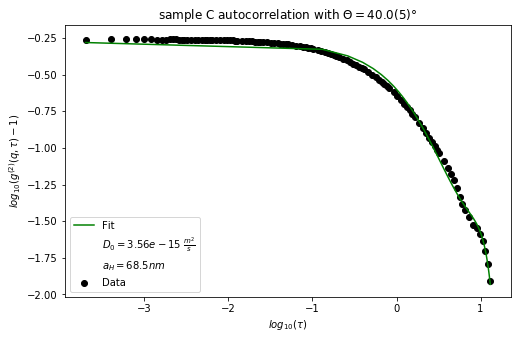

In [34]:
########## sample C ########## 
D0_C_mean = 0
ah_C_mean = 0

fig,ax = plt.subplots(figsize=(8,5))

#cut of the noises at the end
i=0
for x in data_C_cor[0][1]:
    if(x<0.01):
        break
    i+=1
data_C_cor[0][1] = data_C_cor[0][1][:i]
data_C_cor[0][0] = data_C_cor[0][0][:i]  

#fitting the curve
popt, pcov = curve_fit(ln_g_2,(data_C_cor[0][0]),np.log(np.abs(data_C_cor[0][1])),p0=[data_C_cor[0][1][0],-1,1,-1])
d0 = -popt[1]/(q_C**2)    
D0_C_mean = d0
ah = k_b*T/(6*np.pi*η*d0)
ah_C_mean = ah

#Plot der Fits
t = np.linspace((min(data_C_cor[0][0])),(max(data_C_cor[0][0])),100)  
ax.scatter(np.log10(data_C_cor[0][0]),np.log10((data_C_cor[0][1])),c="black",label="Data")
ax.plot(np.log10(t),np.log10(g_2(t,*popt)),c="green",label="Fit")
ax.plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label=r"$D_0=%0.2e \ \frac{m^2}{s} $"%d0)
ax.plot(np.log10(t),np.log10(g_2(t,*popt)),lw=0,label="$a_H=%0.1f nm$"%(ah*10**9))
ax.set_xlabel(r'$log_{10}(\tau)$')
ax.set_ylabel(r'$log_{10}({g^{(2)}(q,\tau)-1})$')
ax.set_title('sample C autocorrelation with $\Theta = %.1f(5)°$'%(np.floor(angle_C)))
ax.legend(loc="best")


print("sample C")
print("averaged hydrodynamic Radius: ",(ah_C_mean*10**9)," nm")
print("averaged diffusion coefficient: ",D0_C_mean," m^2/s")

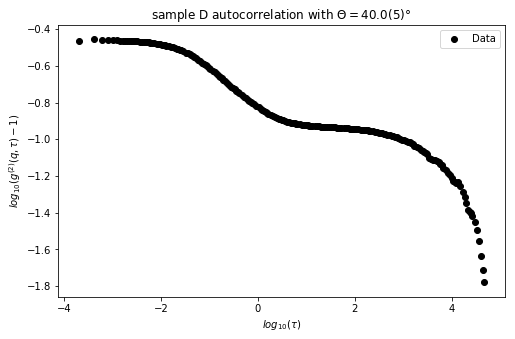

In [11]:
########## sample D ########## 
D0_D_mean = 0
ah_D_mean = 0

fig,ax = plt.subplots(figsize=(8,5))

#cut of the noises at the end
i=0
for x in data_D_cor[0][1]:
    if(x<0.01):
        break
    i+=1
data_D_cor[0][1] = data_D_cor[0][1][:i]
data_D_cor[0][0] = data_D_cor[0][0][:i]  

popt, pcov = curve_fit(ln_g_2,(data_D_cor[0][0]),np.log(np.abs(data_D_cor[0][1])),p0=[-1,1,-1])
d0 = -popt[0]/(q_D**2)    
D0_D_mean = d0
ah = k_b*T/(6*np.pi*η*d0)
ah_D_mean = ah

#Plot der Fits
t = np.linspace((min(data_D_cor[0][0])),(max(data_D_cor[0][0])),100)  
ax.scatter(np.log10(data_D_cor[0][0]),np.log10((data_D_cor[0][1])),c="black",label="Data")
#ax.plot(np.log10(t),np.log10(g_2(t,*popt)),c="green",label="Fit")
ax.set_xlabel(r'$log_{10}(\tau)$')
ax.set_ylabel(r'$log_{10}({g^{(2)}(q,\tau)-1})$')
ax.set_title('sample D autocorrelation with $\Theta = %.1f(5)°$'%(np.floor(angle_C)))
ax.legend(loc="best")


#print("sample D")
#print("hydrodynamic Radius: ",ah_D_mean)
#print("diffusion coefficient: ",D0_D_mean)